# Financial News Sentiment Analysis
#### Queen's University
#### COMM 493: AI Powered Business Decisions
##### Evan Kilburn
##### March 15, 2023
##### This project aims to analyze financial news headlines and classify it as positive, negative, or neutral.

## Business Case

Susan Creasy Financial Inc. is a family run small business in the Kingston that is in the financial services industry. Their business model is business to consumer (B2C) as they market and sell their financial services directly to consumers. Their target customers are adults either employed or retired with capital or assets to manage, or seeking insurance. Susan Creasy Financial Inc.'s primary services are investing, financial planning,retirement planning, estate planning, and life insurance. They are a small business with less than 10 employees and one physical location on Princess St in central Kingston. As well, they have an online presence with their website [susancreasy.ca](https://susancreasy.ca) and LinkedIn corporate page.

### Product Description
The opportunity I am addressing is to make more informed investing decisions with respect to the overall market. This will benefit both Susan Creasy Financial Inc. and their customers, as it will allow SCF to make more informed financial decisions and maximize returns and profits for both their customers and their company. The goal of the Financial News Sentiment Model, is to anticipate the future market moves based on analyzing financial news headlines from around the world. It works by inputing a variety of financial headlines released the morning of market open before 9:30am, then it classifies each headline as positive, negative, or neutral. The business can then sum up the category of each classification and if it is a negative news day Susan Creacy can anticipate a negative market, and if it is a positive news day SFC can anticipate a positive market move. This product can act as an inhouse proprietary market indicator that uses current headlines to predict the short term market moves of the broader markets and indexes such as the S&P 500. This can essentially act as an oscillator which measures the overall sentiment about the broader markets. Susan Creasy Financial Inc. can use this proprietary oscillator along side their other investing valuation practices (such as P/E and inflation analysis) to help predict the future short and long term term  market moves and maximize returns. This can add value to their existing practices as it will give them more data to make better informed investment decisions. This text analysis model was made to anticipate broader market moves such as the S&P 500 which many investors use for long term investments. This aligns with Susan Creasy Financial Inc. goals as many of their services focus on long term investing and planning (such as investing for retirement). 

### Business Value
This product will offer long term value to Susan Creasy Financial Inc. and improve its accuracy over time with retraining and new data. This product offers value as an oscillator to detect the overall sentiment of the broader financial markets. Susan Creasy Financial Inc. can trade off this information and make more informed trades that maximize value for customers and in turn create more profit for them. This aligns with their values as customer relationships are very important to them, so increasing returns for customers would help maintain and strengthen those relationships and trust. 

Additionally, this tool can start to be used immediately. However intergrating it into daily use may take a few weeks to understand the degree to which the number of positive and negative headlines impact the overall market. As well, SFC will need to decide on which newspaper headlines to input regularly so their sentiment oscillator will have greater consistency and accuracy by inputting the same headlines from the same sources every day. Once the oscillator is integrated it will generate long term value assisting better trades for the forseeable future. Susan Creasy Financial Inc. should expect a 2-5% increase in all broad index related trades (such as VOO) after one year of using the model trained on new data. To improve the accuracy of the Financial Sentiment Analysis model in order to achieve the 2-5% trade profit increase, Susan Creasy Financial Inc. would be required to colect headlines in the morning before 9:30am when major North America markets open. They will have several key news sources such as The New York Times, Financial Post, and Wall Street Journal, from which they will collect the new headlines from and enter them into the model. Then every couple of days they can add the headlines and their classification to the training set to improve accuracy and identify key terms and patterns for the future. For example, if the 2 year T-bill has an inveted yield curve and several headlines are negatively talking about the 2 year T-bill then the model can learn that when it see's a upcoming mention of the 2 year T-bill it will likely be a negative headline. Alternatively, this process could be automated with a webscraper that scrapes the key online news websites SFC deems credible then it will display the results of positive/neutral/negative per source and total amounts to better act as an oscillator and integrate easier with no additional work. 

As well, with the help of marketing, Susan Creasy Financial Inc. could attract new clients as they have new proprietary trading oscillators and metrics. This would be very appealing to new customers as they can see they are investing and expanding their investment side which is appealing.

## Data
### Data Description
The data was collected from Kaggle with the title "Sentiment Analysis for Financial News", and can be found [here](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news?resource=download). This data set is designed for multi-class classification as it has three potential labels which are: Positive, Neutral, and Negative. The data set contains two columns: sentiment (multi-class label) and news headline. Its intended purpose was to be used for sentiment analysis of financial news headlines data.

Attributes for the S&P 500 Data:
* Label - multi-class classification label: positive, neutal, negative
* News Headline - financial news headline

For my proof of concept I am using this data some modifications. This data needs to be cleaned but no major modifications are needed. The data set closely matches my desired inputs and labeling, however it doesn't state where the news headlines were taken from so it may not be a relevant source for North America trades and it may not be a reliable or trustworthy source. As well, from the word cloud shown below we can see that most of the data is focused on Finland and European markets. But,for the proof of concept this data is exactly what I need as its intended purpose was to be used for sentiment analysis of financial news headlines data which is the exact implementation I will be using it for.

To go live with this solution, SFC will need to be a few modifications. The first is collecting more recent data, this data set was last updated over 3 years ago, and to go live it should have more recent headlines. More recent headlines can be found and added from various reliable news papers and financial news sites. Additionally the sources of the headline data is unknown, so it could potentially be from an untrustworth or irrelevant source. A large amount of this data is likely irrelevant as in the word cloud below the data appears to focus on Finland and European markets. This data should be more focused on Canada and The USA to have more relevant and meaningful data. To fix this SFC should build this data set using reliable North American news papers and financial news sites for their data. This will yield a more relevant result to the overall market moves and it is more trustworthy data that will have a larger impact to investors and the overall market. 

### Data Exploration 
#### Start off by preparing the environment
Upgrade the version of boto3 and sagemaker, install wordcloud for visualization, and install dependencies.

In [ ]:
%pip install -qU --upgrade boto3
%pip install -qU --upgrade sagemaker

In [1]:
# Install Wordcloud

%pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 7.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


#### Import all the libraries I will be using for the project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
import sagemaker
from sagemaker.estimator import Estimator 
from sagemaker import get_execution_role
import boto3
from sagemaker import image_uris
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import time
from time import gmtime, strftime
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import re

#### Download the NTLK Trained Models, Stopwords list,and Corpus Reader
The trained model punkt divides text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. The stop words list is a list of words that you do not want to use to describe the topic of your content, they are words that have no impact in a sentence sentiment such as: "the", "and", "a". The corpus reader (word net) is a database that identifies words that have the same meaning/value and can be used to convert similar words to the same word.

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...


True

#### Set up our environment variables

In [4]:
role = get_execution_role()
sess = sagemaker.Session() 
region = sess.boto_session.region_name
bucket = sess.default_bucket()
print("The role is ", role)
print("The session is ", sess)
print("The region is ", region)
print("The bucket is ", bucket)

The role is  arn:aws:iam::831949839945:role/LabRole
The session is  <sagemaker.session.Session object at 0x7f479935b520>
The region is  us-east-1
The bucket is  sagemaker-us-east-1-831949839945


#### Load the Data
The first issue I encounteded when dragging my csv file into the AWS environment was I got an error when trying to open the csv file. I got an error stating that it was not UTF-8 encode, so I opened the file in Excel and saved it as a UTF-8 csv, which resolved the error.

In [5]:
# Load the dataset into a DataFrame usign comma as the delimiter and headline_data.csv as the file name.
# I am including names specifications so Pandas labels the first column as Label and second column as Headline, as the data did not have a header row

headline_data=pd.read_csv('headline_data.csv', sep=',', names=["Label","Headline"])

#### Explore Data

In [6]:
# Show us the shape
# we can see the result is (4846, 2) which means there are 2 columns and 4846 rows

headline_data.shape

(4846, 2)

In [7]:
# Show the first 5 rows of the data
# we can see the headlines contain capitals and punctuation (we will remove later)
# Note that our columns are labeled from loading with the names attribute

headline_data.head()

,Label,Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [8]:
# Show the last 5 rows of the data

headline_data.tail()

,Label,Headline
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...
4845,negative,Sales in Finland decreased by 10.5 % in Januar...


In [9]:
# Summary of the data frame

headline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     4846 non-null   object
 1   Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [10]:
# describe the data with descriptive statistics that summarize the central tendency, dispersion and shape of the dataset’s distribution, and excludes NaN values
# here we can see there are 3 unique labels and 4846 unique headlines, neutral is the highest frequency label, and there are two duplicate headlines.
# we will inspect the duplictate headlines more in Data Transformation

headline_data.describe()

,Label,Headline
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


In [11]:
# Check to see if there are any missing values

headline_data.isnull().sum()

Label       0
Headline    0
dtype: int64

In [12]:
# Use the group by to see how many records there are for each label

headline_data.groupby('Label').describe()

Headline                                                            \
            count unique                                                top   
Label                                                                         
negative      604    604  The international electronic industry company ...   
neutral      2879   2873  SSH Communications Security Corporation is hea...   
positive     1363   1363  With the new production plant the company woul...   

               
         freq  
Label          
negative    1  
neutral     2  
positive    1

In [13]:
text = " ".join(review for review in headline_data['Headline'])
print ("There are {} words in the combination of all headlines.".format(len(text)))

There are 625773 words in the combination of all headlines.


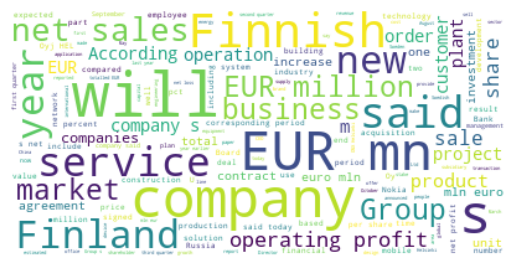

In [14]:
# Generate a word cloud image with uncleaned data
wordcloud = WordCloud(max_font_size=50, max_words=150, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From this wordcloud we can see that this data set is primarily focused on Europe's markets and Finland specifically.

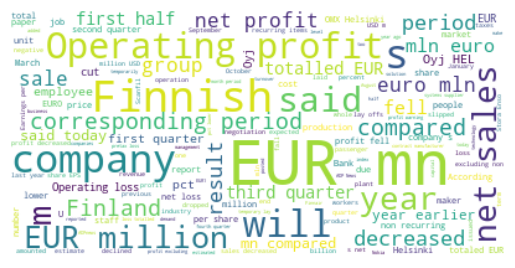

In [15]:
# Generate a word cloud image with uncleaned data for all negative entries
negative_df = headline_data[headline_data['Label'] == 'negative']
text = " ".join(review for review in negative_df['Headline'])
wordcloud = WordCloud(max_font_size=50, max_words=150, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Here we can see that negative places distinct emphasis on Operating, Profit, Million, Decreased, Fell, Lower

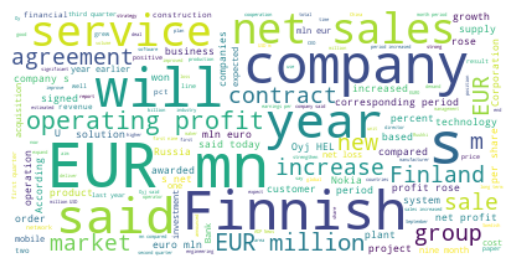

In [16]:
# Generate a word cloud image with uncleaned data for all positive entries
positive_df = headline_data[headline_data['Label'] == 'positive']
text = " ".join(review for review in positive_df['Headline'])
wordcloud = WordCloud(max_font_size=50, max_words=150, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Here we can see that positive places distinct emphasis on Net, Sales, Increased, Company

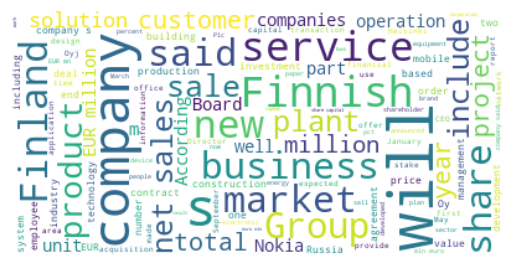

In [17]:
# Generate a word cloud image with uncleaned data for all neutral entries
neutral_df = headline_data[headline_data['Label'] == 'neutral']
text = " ".join(review for review in neutral_df['Headline'])
wordcloud = WordCloud(max_font_size=50, max_words=150, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Here we can see that neutral places distinct emphasis on Group, Share, Market, Said, Business

### Data Insights
Insights from Operations:
From using the .shape operation we got the response (4846, 2) which meant there are 2 columns and 4846 rows. From using the .head() operation we saw the first 5 rows and all column headers. We used .tail() to see the last 5 rows in the data frame which all looked valid. Then we used .isnull() and .info() to get a summary of the data frame and to validate that there are no null entries in the data. We used .describe() to see how many records there are for each label, and an interesting result from this was the frequency row for healine column in the dataframe had a duplicate headline entry as it had a frequency of 2. This is an issue that is resolved in the Data Transformation section below. Next we group by label and describe() which shows us we have 604 negative labeled rows, 2879 positive labeled rows, and 1363 positive labeled rows. We can see there is a slight data imbalance of labels, for future retraining and for non-proof of concept, it would be best to increase the amount of negative labeled values so there is a more equitable distribution for training and testing purposes. Last we visualized the data with word clouds, the first word cloud was all the data in the data frame headline column where we saw that this data set is primarily focused on Europe's markets and Finland specifically. Then we made data frames for each unique label. For the negative label, the word cloud placed unique emphasis on Operating, Profit, Million, Decreased, Fell, and Lower. For the positive label, the word cloud placed unique emphasis on Net, Sales, Increased, and Company. For the neutral label, the word cloud placed unique emphasis on Group, Share, Market, Said, and Business.

### Data Transformation

#### Drop Duplicate Rows

In [18]:
# view the duplicate rows

headline_data.loc[headline_data['Headline'] == "TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sells stake in Morning Digital Design Oy Finnish IT company TJ Group Plc said on Friday 7 April that it had signed an agreement on selling its shares of Morning Digital Design Oy to Edita Oyj ."]



,Label,Headline
78,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
79,positive,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...


Above we can see that row 78 and 79 contain the same headline and different labels. This is not valid to have two different labels for the same headline. At first I thought to drop the invalid one, however with the context that the headline is from 2006 and on a Finish company selling their stake, I don't have enough information to determine whether this was positive, negative, or netural. Therefore, I will drop both rows.

In [19]:
# Drop row 78 and 79 and display rows 78-80
headline_data = headline_data.drop(78)
headline_data = headline_data.drop(79)

display(headline_data.loc[76:80])


,Label,Headline
76,neutral,Other measures included increasing synergies a...
77,positive,"Rinkuskiai raised the sales by 18.1 percent , ..."
80,neutral,"The 718,430 new Series A shares will become su..."


#### Make lowercase

In [20]:
headline_data['Headline'] = headline_data['Headline'].str.lower()
headline_data['Headline']

0       according to gran , the company has no plans t...
1       technopolis plans to develop in stages an area...
2       the international electronic industry company ...
3       with the new production plant the company woul...
4       according to the company 's updated strategy f...
                              ...                        
4841    london marketwatch -- share prices ended lower...
4842    rinkuskiai 's beer sales fell by 6.5 per cent ...
4843    operating profit fell to eur 35.4 mn from eur ...
4844    net sales of the paper segment decreased to eu...
4845    sales in finland decreased by 10.5 % in januar...
Name: Headline, Length: 4844, dtype: object

#### Remove website URLs, whitespace at the front and end of the sentence, punctuation, and numbers

In [21]:
headline_data['Headline'] = headline_data['Headline'].apply(lambda x : re.sub('http://\S+|https://\S+', '', x)) # remove website URLS
headline_data['Headline'] = headline_data['Headline'].apply(lambda x : x.strip()) # remove whitespace
headline_data['Headline'] = headline_data['Headline'].apply(lambda x: x.translate (str.maketrans('', '', string.punctuation))) #remove punctuation
headline_data['Headline'] = headline_data['Headline'].apply(lambda x: x.translate (str.maketrans('', '', string.digits))) # remove numbers
headline_data

,Label,Headline
0,neutral,according to gran the company has no plans to...
1,neutral,technopolis plans to develop in stages an area...
2,negative,the international electronic industry company ...
3,positive,with the new production plant the company woul...
4,positive,according to the company s updated strategy fo...
...,...,...
4841,negative,london marketwatch share prices ended lower i...
4842,neutral,rinkuskiai s beer sales fell by per cent to ...
4843,negative,operating profit fell to eur mn from eur mn ...
4844,negative,net sales of the paper segment decreased to eu...


#### Tokenize, remove stopwords, lemmatize words

In [22]:
headline_data['Headline'] = headline_data['Headline'].apply(word_tokenize) # tokenize - make words into list elements (seperate at spaces)
stop_words = set(stopwords.words('english')) # get english stop words list
headline_data['Headline'] = headline_data['Headline'].apply(lambda x: [word for word in x if word not in (stop_words)]) # remove stopwords from headlines
word_lemmatizer = WordNetLemmatizer() # get word lemmatizer
headline_data['Headline'] = headline_data['Headline'].apply(lambda x: [word_lemmatizer.lemmatize(word) for word in x]) # lematize all words in headlines
headline_data['Headline'] = headline_data['Headline'].apply(lambda x: ' '.join(x)) # make back into sentance
headline_data.head() # print first 5 rows

,Label,Headline
0,neutral,according gran company plan move production ru...
1,neutral,technopolis plan develop stage area le square ...
2,negative,international electronic industry company elco...
3,positive,new production plant company would increase ca...
4,positive,according company updated strategy year baswar...


In [23]:
text = " ".join(review for review in headline_data['Headline'])
print ("There are {} words in the combination of all headlines.".format(len(text)))

There are 432047 words in the combination of all headlines.


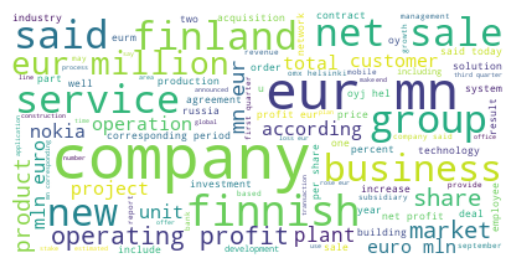

In [24]:
# Generate a clean word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see the stop words have been removed, but Finnish, Finland, and Finish slang: oyj, hel, oy  are still large words as this data set is focused in there. We will remove the slang words as they are esentially stop words.

In [25]:
stop_words.add("hel") # add hel to stop words set (can't use append as type set)
stop_words.add("oyj") # add oyj to stop words set
stop_words.add("oy") # add oy to stop words set

# tokenize and remove additional stop words then convert back to sentance
headline_data['Headline'] = headline_data['Headline'].apply(word_tokenize) # tokenize - make words into list elements (seperate at spaces)
headline_data['Headline'] = headline_data['Headline'].apply(lambda x: [word for word in x if word not in (stop_words)]) # remove stopwords from headlines
headline_data['Headline'] = headline_data['Headline'].apply(lambda x: ' '.join(x)) # make back into sentance

print(stop_words)

{'should', "that'll", 'our', 'an', 'did', 'was', 'why', 'weren', 'then', 'because', 'only', 'there', 'all', 'from', 'after', 'll', 'her', 'had', 'ain', 'do', 'am', 'if', 'what', 'is', 'oy', "wouldn't", "hasn't", 'no', 'will', 'he', 'aren', 'how', 'at', 'you', 'not', 'who', 're', 'any', 'those', 'about', "aren't", 'myself', 'isn', 'she', "you've", 'y', 'doesn', 'until', 'to', 'and', 'which', 'the', 'haven', 's', 'being', 'very', 'when', 'their', 'for', 'where', 'can', 'other', 'have', 'some', "it's", "haven't", 'over', 'again', 'ma', 'd', 'i', "needn't", "didn't", 'most', "mightn't", 'between', 'few', "should've", 'that', 'while', 'own', "couldn't", 'needn', 'once', 'whom', 'having', "don't", 'as', 'just', 'has', 'yours', 'but', 'himself', 'hel', 'shan', "isn't", 'with', 'on', 'we', 'couldn', 'wouldn', 'themselves', "mustn't", 'nor', 'its', 'through', 'or', 'both', 'hers', 'of', 'against', 'don', 'in', 'doing', 't', "weren't", 'itself', 'below', 'are', 'hasn', 'theirs', 'such', 'than', 

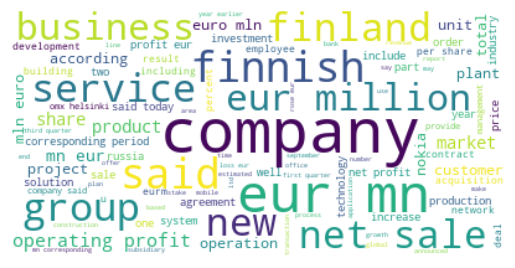

In [26]:
text = " ".join(review for review in headline_data['Headline'])

# Generate a clean word cloud image with extra stop words
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Convert Labels to numbers and append to start of headline
For our conversion we will use the following transformation:
* negative: __label__0
* neutral: __label__1
* positive: __label__2

In [27]:
# Use the group by to see how many records there are for each label

headline_data.groupby('Label').describe()

Headline                                                            \
            count unique                                                top   
Label                                                                         
negative      604    593           earnings per share eps amounted loss eur   
neutral      2878   2840                                 value order eur mn   
positive     1362   1336  operating profit rose eur mn eur mn correspond...   

               
         freq  
Label          
negative    3  
neutral     7  
positive    6

Duplicates can be explained by our elimination of stop words.

In [28]:
for ind in headline_data.index: # iterate through every row
    if headline_data['Label'][ind] == 'negative': # if negative label
        headline_data['Label'][ind] = '__label__0' # set label to 0
    elif headline_data['Label'][ind] == 'neutral': # if neutral label
        headline_data['Label'][ind] = '__label__1' # set label to 1
    else: # else (positive label)
        headline_data['Label'][ind] = '__label__2' # set label to 2

headline_data.groupby('Label').describe()

Headline                                                            \
              count unique                                                top   
Label                                                                           
__label__0      604    593           earnings per share eps amounted loss eur   
__label__1     2878   2840                                 value order eur mn   
__label__2     1362   1336  operating profit rose eur mn eur mn correspond...   

                 
           freq  
Label            
__label__0    3  
__label__1    7  
__label__2    6

In [29]:
headline_data.head()

,Label,Headline
0,__label__1,according gran company plan move production ru...
1,__label__1,technopolis plan develop stage area le square ...
2,__label__0,international electronic industry company elco...
3,__label__2,new production plant company would increase ca...
4,__label__2,according company updated strategy year baswar...


To summarize our actions in Data Transformation, we started by analyzing the duplicate rows. We found that they were the same headline and had different labels, and since we didn't have enough context to know which label was correct we dropped both rows. Then we made everything lowercase, removed website URLs, removed whitespace at the front and end of the sentence, removed punctuation, and removed numbers. Then we removed stop words and lemanized the tokenized words, and after viewing the word cloud we expanded the stop words set to include Finish slag words and removed them from the tokenized sentences. Last we conveted our labels to use __label__Number as BlazingText requires this, and for our encoding is: negative is __label__0, neutral is __label__1, positive is __label__2.

## Training
### Training Description
We will use supervised learning which is a type of machine learning that trains itself using known inputs and labeled outputs to generalize future outputs. A distinct feature of supervised learning when compared to unsupervised learning is that it knows the desired output for a given input (the data set is labeled). We will be using multi-class classification which helps predict a distinct class label. For our use case we will have 3 distinct classes as followed: negative - __label__0, neutral - __label__1, and positive - __label__2. We will be predicting the overall sentiment of a given headline to either be positive, neutral or negative. Multi-class classification is the best approach as we have 3 distinct classes so binary classification wouldn't be able to work. We will be using Amazon's BlazingText algorithm which uses Word2vec and text classification algorithms which can scale to work well with large data sets. We will implementing BlazingText's ability for semantic classification for this model.

### Training the Model

In [30]:
# Shuffle and Split the data into 80% training and 20% validating
train_data, validate_data = train_test_split(headline_data, test_size=0.2)

# Convert dataframes to back to text files (even though saving as .csv they are text files) and save them locally to the notebook
# Make sure to exclude the headers so that BlazingText will accept the file
train_data.to_csv('headline_data.train', sep=' ', header=False, index=False, quotechar=" ")
validate_data.to_csv('headline_data.validate', sep=' ', header=False, index=False, quotechar=" ")

In [31]:
# Copy the file to a S3 bucket using sess.upload_data
# We will need to pass the file to be uploaded, a prefix (top level folder to store the data) and the subfolders
# Here we will also define the output folder for the results

prefix = 'financial_news'
training_data_path = sess.upload_data( path='headline_data.train', key_prefix=prefix + '/input/train') 
validation_data_path = sess.upload_data( path='headline_data.validate', key_prefix=prefix + '/input/validate')
output_data_path = 's3://{}/{}/output'.format(bucket, prefix)
print(training_data_path)
print(validation_data_path)
print(output_data_path)

s3://sagemaker-us-east-1-831949839945/financial_news/input/train/headline_data.train
s3://sagemaker-us-east-1-831949839945/financial_news/input/validate/headline_data.validate
s3://sagemaker-us-east-1-831949839945/financial_news/output


In [32]:
# Create the training container
from sagemaker.image_uris import retrieve

# List of frameworks that can be retrieved https://sagemaker.readthedocs.io/en/stable/frameworks/index.html
# List of Built-in Algorithms that can be retrieved https://sagemaker.readthedocs.io/en/stable/algorithms/index.html
container = image_uris.retrieve(framework='blazingtext',region=region)

In [33]:
# Creating data channels
# Creating a definition for input data used by SageMaker training job

train_data = sagemaker.inputs.TrainingInput(
    training_data_path,
    distribution="FullyReplicated",
    content_type="text/plain",
    s3_data_type="S3Prefix",
)
validate_data = sagemaker.inputs.TrainingInput(
    validation_data_path,
    distribution="FullyReplicated",
    content_type="text/plain",
    s3_data_type="S3Prefix",
)
data_channels = {"train": train_data, "validation": validate_data}

In [34]:
# Here we are using the only required hyperameter and everything else will be set to default

bt_model = Estimator(
    container,
    role,
    instance_count=1,
    instance_type="ml.m5.large", # upped the size for faster operations
    volume_size=30,
    max_run=360000,
    input_mode="File",
    output_path=output_data_path,
    hyperparameters={
        "mode": "supervised"
    },
)

Below we are training the model to get a baseline result without hypertuning any paramerers. This will allow us to see the impact of hypertuning parameters.

In [35]:
# Train the model with no tuning

bt_model.fit(inputs=data_channels, logs=True)

INFO:sagemaker:Creating training-job with name: blazingtext-2023-03-17-21-35-15-174


2023-03-17 21:35:15 Starting - Starting the training job...
2023-03-17 21:35:33 Starting - Preparing the instances for training......
2023-03-17 21:36:27 Downloading - Downloading input data...
2023-03-17 21:37:12 Training - Downloading the training image..Arguments: train
[03/17/2023 21:37:22 WARNING 139621510117184] Loggers have already been setup.
[03/17/2023 21:37:22 WARNING 139621510117184] Loggers have already been setup.
[03/17/2023 21:37:22 INFO 139621510117184] nvidia-smi took: 0.025186777114868164 secs to identify 0 gpus
[03/17/2023 21:37:22 INFO 139621510117184] Running single machine CPU BlazingText training using supervised mode.
Number of CPU sockets found in instance is  1
[03/17/2023 21:37:23 INFO 139621510117184] Processing /opt/ml/input/data/train/headline_data.train . File size: 0.41585731506347656 MB
[03/17/2023 21:37:23 INFO 139621510117184] Processing /opt/ml/input/data/validation/headline_data.validate . File size: 0.10517692565917969 MB
Read 0M words
Number of w

Above we can see the validation accuracy of 0.60 before hyperparameter tuning.

### Hyperparameter Tuning

In [36]:
# Again we are using the only required hyperameter and everything else will be set to default

bt_model = Estimator(
    container,
    role,
    instance_count=1,
    instance_type="ml.m5.large",
    volume_size=30,
    max_run=360000,
    input_mode="File",
    output_path=output_data_path,
    hyperparameters={
        "mode": "supervised"
    },
)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [37]:
# The BlazingText Text Classification algorithm (supervised mode)
# Our tuning metric is validation:accuracy, which is accuracy on our specified validation dataset

from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter, HyperparameterTuner

hypertuner = HyperparameterTuner(bt_model, 
                                 objective_metric_name = 'validation:accuracy',
                                 hyperparameter_ranges = {
                                 'epochs' : CategoricalParameter([1,3,5]),
                                 'min_count' : CategoricalParameter([1,3,5]),
                                 'learning_rate' : ContinuousParameter(0.01, 0.1),
                                 'batch_size': CategoricalParameter([32,64,128,256,512])},   
                                 objective_type = 'Maximize',
                                 metric_definitions = [{'Name': 'validation:accuracy', 'Regex': 'loss (\S+)'}],
                                 max_jobs=10, 
                                 max_parallel_jobs=1
                                )

In [38]:
# Start the training and tuning
# Fit this Estimator on our data stored in S3.
# Now we are going to Fit the model

hypertuner.fit(inputs=data_channels, logs=True)

INFO:sagemaker:Creating hyperparameter tuning job with name: blazingtext-230317-2140


..............................................................................................................................................................................................................................................................................................................................................................................................!


In [39]:
print("Best hyerparameter tuning job:{}".format(hypertuner.best_training_job()))
print("Best parameters found={}".format(hypertuner.best_estimator().hyperparameters()))

Best hyerparameter tuning job:blazingtext-230317-2140-001-246b9d8f

2023-03-17 21:44:58 Starting - Preparing the instances for training
2023-03-17 21:44:58 Downloading - Downloading input data
2023-03-17 21:44:58 Training - Training image download completed. Training in progress.
2023-03-17 21:44:58 Uploading - Uploading generated training model
2023-03-17 21:44:58 Completed - Resource reused by training job: blazingtext-230317-2140-002-f9488e23
Best parameters found={'_tuning_objective_metric': 'validation:accuracy', 'batch_size': '512', 'epochs': '5', 'learning_rate': '0.08701634192776123', 'min_count': '1', 'mode': 'supervised'}


In [50]:
# Set the BlazingText hyperparameters
# We will use the tuned values recommended above

bt_model = Estimator(
    container,
    role,
    instance_count=1,
    instance_type="ml.m5.large",
    volume_size=30,
    max_run=360000,
    input_mode="File",
    output_path=output_data_path,
    hyperparameters={
        '_tuning_objective_metric': 'validation:accuracy', 
        'batch_size': '512', 'epochs': '5', 
        'learning_rate': '0.08701634192776123', 
        'min_count': '1', 
        'mode': 'supervised'
    },
)

In [51]:
# Now we are going to Fit the model (train it)
# Documentaiton for FIT https://sagemaker.readthedocs.io/en/stable/algorithms/sagemaker.amazon.amazon_estimator.html#sagemaker.amazon.amazon_estimator.AmazonAlgorithmEstimatorBase.fit

bt_model.fit(inputs=data_channels, logs=True)

INFO:sagemaker:Creating training-job with name: blazingtext-2023-03-17-22-21-33-418


2023-03-17 22:21:33 Starting - Starting the training job...
2023-03-17 22:22:00 Starting - Preparing the instances for training......
2023-03-17 22:22:50 Downloading - Downloading input data...
2023-03-17 22:23:25 Training - Downloading the training image..Arguments: train
[03/17/2023 22:23:44 WARNING 140066742912832] Loggers have already been setup.
[03/17/2023 22:23:44 WARNING 140066742912832] Loggers have already been setup.
[03/17/2023 22:23:44 INFO 140066742912832] nvidia-smi took: 0.025183916091918945 secs to identify 0 gpus
[03/17/2023 22:23:44 INFO 140066742912832] Running single machine CPU BlazingText training using supervised mode.
Number of CPU sockets found in instance is  1
[03/17/2023 22:23:44 INFO 140066742912832] tuning_objective_metric: validation:accuracy
[03/17/2023 22:23:44 INFO 140066742912832] Processing /opt/ml/input/data/train/headline_data.train . File size: 0.41585731506347656 MB
[03/17/2023 22:23:44 INFO 140066742912832] Processing /opt/ml/input/data/validat

For the hyperparameter tuning above, I started off by specifying that our objective_metric_name is validation:accuracy. Validation:accuracy is the accuracy metric from our validation (testing data set). This will be beneficial to our model as we want to maximize this as this improves our sentiment understanding and is a great application for the proof of concept that our model works and is accuract with headline data it has never seen before. With that metric set as our objective we fit the model to get the tuned hyperparameters which gave the following output:

Best parameters found={'_tuning_objective_metric': 'validation:accuracy', 'batch_size': '512', 'epochs': '5', 'learning_rate': '0.08701634192776123', 'min_count': '1', 'mode': 'supervised'}

Then we set the tuned hyperparameters to our estimator accordingly and ran the training set again which yielded a validation accuracy of:61.92%, in comparison to our non hyperparameter tuned validation accuracy of: 60.37%. Here we can see that hypertuning does improve the accuracy of the model by 1.55%.

### Model Evaluation
From previous sample training/testing runs I got the following outputs:

Before Hyperparameter tuning:
Read 0M words
Number of words:  1656
Alpha: -0.0000  Progress: 100.02%  Million Words/sec: 2.69 #####
Alpha: 0.0000  Progress: 100.00%  Million Words/sec: 2.68 #####
Training finished.
Average throughput in Million words/sec: 2.68
Total training time in seconds: 0.10
#train_accuracy: 0.6289
Number of train examples: 3875
#validation_accuracy: 0.6037
Number of validation examples: 969

After Hyperparameter tuning:
Read 0M words
Number of words:  7620
Alpha: -0.0000  Progress: 100.03%  Million Words/sec: 2.69 #####
Alpha: 0.0000  Progress: 100.00%  Million Words/sec: 2.68 #####
Training finished.
Average throughput in Million words/sec: 2.68
Total training time in seconds: 0.10
#train_accuracy: 0.6583
Number of train examples: 3875
#validation_accuracy: 0.6192
Number of validation examples: 969


To evaluate this model, our training objective which we aimed to maximize was validation_accuracy. This decimal when multiplied by 100% gives us the accuracy percentage of predicting labels from our validation dataset. We can see the validation accuracy improves after hyperparameter tuning which adjusted various components such as the batch size and learning rate. With the parameters optimized we got a validation accuracy of 61.92%. This may at first look like a low accuracy, however to correctly interpret this number, unlike binary classification where our baseline of chance is 50%, we have 3 distinct label classes so our baseline is 33%. This is almost double the base chance rate which is actually quite good. The best use for the model based on the training results is to actually be used in production for sentiment analysis as its accuracy is quite high and is much better than a random guess. To improve the performance of this model, more recent and credible training data would be beneficial, especially training data that is equally distributed between all 3 labels (equal training data for all) as earlier we saw we had only a few negative labels which we trained our model with.


## Deploy
### Deployment Description
The deployed model will have a text based interface that will prompt the user to enter in a string containing a newspaper headline. The user will need to enter a sting for the newspaper headline which can contain links, numbers and punctuation as the interface logic will remove this before it is put in our model. The model will then return the predicted label and a confidence value (likelihood of its guess).

### Model Deployment
The below code deploys and deletes the model. To use the model in further sections do not run the delete command.

In [52]:
# Retrieve model data from training job

training_job_model_data = bt_model.model_data
training_job_model_data

's3://sagemaker-us-east-1-831949839945/financial_news/output/blazingtext-2023-03-17-22-21-33-418/output/model.tar.gz'

In [53]:
# Create a unique model name so it won't overwrite ones taht are already there using date and time
deployed_BlazingText_model_name = "headline-bt-model" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("Model name is " + deployed_BlazingText_model_name)

Model name is headline-bt-model2023-03-17-22-26-36


In [54]:
# Container Definition https://docs.aws.amazon.com/sagemaker/latest/APIReference/API_ContainerDefinition.html

# create a low-level client representing Amazon SageMaker Service (using boto3) and provides APIs for creating and managing SageMaker resources
client = boto3.client(service_name="sagemaker")

# storing model in a container (environment with all required packages so it can run independently)
create_model_response = client.create_model(
    ModelName=deployed_BlazingText_model_name,
    Containers=[
        {
            "Image": container, # use the same container defined in the estimator
            "ModelDataUrl": training_job_model_data
        }
    ],
    ExecutionRoleArn=role,
)

# print unique url (id) for the resource
print("Model Arn: " + create_model_response["ModelArn"])

Model Arn: arn:aws:sagemaker:us-east-1:831949839945:model/headline-bt-model2023-03-17-22-26-36


In [55]:
# create unique name as date time appended at the end
headline_epc_name = "headline-serverless-epc" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())

# create an endpoint configuration that is connected to the model
endpoint_config_response = client.create_endpoint_config(
    EndpointConfigName=headline_epc_name,
    ProductionVariants=[
        {
            "VariantName": "btVariant",
            "ModelName": deployed_BlazingText_model_name,
            "ServerlessConfig": {
                "MemorySizeInMB": 4096,
                "MaxConcurrency": 1,
            },
        },
    ],
)

# print unique url (id) for the resource
print("Endpoint Configuration Arn: " + endpoint_config_response["EndpointConfigArn"])

Endpoint Configuration Arn: arn:aws:sagemaker:us-east-1:831949839945:endpoint-config/headline-serverless-epc2023-03-17-22-26-39


In [56]:
# create unique name as date time appended at the end
headline_ep_name = "headline-serverless-ep" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())

# create an endpoint for the model with the above config so we can call the model using this endpoint
create_endpoint_response = client.create_endpoint(
    EndpointName=headline_ep_name,
    EndpointConfigName=headline_epc_name,
)

# print unique url (id) for the resource
print("Endpoint Arn: " + create_endpoint_response["EndpointArn"])

Endpoint Arn: arn:aws:sagemaker:us-east-1:831949839945:endpoint/headline-serverless-ep2023-03-17-22-26-41


In [ ]:
# wait for endpoint to reach a terminal state (InService) using describe endpoint
import time

describe_endpoint_response = client.describe_endpoint(EndpointName=headline_ep_name)

# wait for endpoint to be created
while describe_endpoint_response["EndpointStatus"] == "Creating":
    describe_endpoint_response = client.describe_endpoint(EndpointName=headline_ep_name)
    print(describe_endpoint_response["EndpointStatus"])
    time.sleep(15)

# display created endpoint's details
describe_endpoint_response

Creating
Creating
Creating
Creating
Creating
Creating
Creating
Creating
InService


{'EndpointName': 'headline-serverless-ep2023-03-17-22-26-41',
 'EndpointArn': 'arn:aws:sagemaker:us-east-1:831949839945:endpoint/headline-serverless-ep2023-03-17-22-26-41',
 'EndpointConfigName': 'headline-serverless-epc2023-03-17-22-26-39',
 'ProductionVariants': [{'VariantName': 'btVariant',
   'DeployedImages': [{'SpecifiedImage': '811284229777.dkr.ecr.us-east-1.amazonaws.com/blazingtext:1',
     'ResolvedImage': '811284229777.dkr.ecr.us-east-1.amazonaws.com/blazingtext@sha256:f4a2d23762e88d6b992495a9a6384fd64f819fcbc2e143d8af222637ed6822ff',
     'ResolutionTime': datetime.datetime(2023, 3, 17, 22, 26, 41, 897000, tzinfo=tzlocal())}],
   'CurrentWeight': 1.0,
   'DesiredWeight': 1.0,
   'CurrentInstanceCount': 0,
   'CurrentServerlessConfig': {'MemorySizeInMB': 4096, 'MaxConcurrency': 1}}],
 'EndpointStatus': 'InService',
 'CreationTime': datetime.datetime(2023, 3, 17, 22, 26, 41, 385000, tzinfo=tzlocal()),
 'LastModifiedTime': datetime.datetime(2023, 3, 17, 22, 28, 45, 292000, tzi

### Model Response

We will be performing sentiment analysis on the following headline: "Sales for both the Department Store The Bay and Sears increased by 7 % , while sales for the clothing store subsidiary Aritzia decreased by 4 %". To go through a sample analysis lets start by reading the headline, here we can see it conveys both positive and negative sentiment, and overall should yield a neutral sentiment or negative as decreases in sales aren't as common. As well, from looking at the headline we should be able to pass this into our model, but it is not cleaned so it's results will be less accurate. BlazingText uses Word2Vec and requires words only so we will need to remove all percents and numbers, however key words like increased and decreased are important to help our prediction. To get data to be used on the model simply go to any credible financial news website such as the Wall Street Journal and copy one of their key headlines.

The response of the static call below with the headline "Sales for both the Department Store The Bay and Sears increased by 7 % , while sales for the clothing store subsidiary Aritzia decreased by 4 %" gave: [{'label': ['__label__0'], 'prob': [0.39779573678970337]}]. To interpret this result beside the label: is the labeled result, here the assigned label is __label__0 which is negative. If we recall 0: negative, 1: neutral, 2: positive. As well, beside it is its confidence or probability value of 39.78% (when converted). This is a low confidence (confidence must be >= 33.33%) as it could easily be classified as a neutral or negative comment, so this makes sense.

In [67]:
# Sample headline
sentence = ["Sales for both the Department Store The Bay and Sears increased by 7 % , while sales for the clothing store subsidiary Aritzia decreased by 4 %"]

# Convert List to Dataframe
headline_df = pd.DataFrame(sentence)
headline_df.columns = ['text']
headline_df  = headline_df .astype('string') #Make senteces lowercase

# clean sentence
headline_df['text'] = headline_df['text'].str.lower() # make lowercase
headline_df['text'] = headline_df['text'].apply(lambda x : re.sub('http://\S+|https://\S+', '', x)) # remove website URLS
headline_df['text'] = headline_df['text'].apply(lambda x : x.strip()) # remove whitespace
headline_df['text'] = headline_df['text'].apply(lambda x: x.translate (str.maketrans('', '', string.punctuation))) #remove punctuation
headline_df['text'] = headline_df['text'].apply(lambda x: x.translate (str.maketrans('', '', string.digits))) # remove numbers
headline_df['text'] = headline_df['text'].apply(word_tokenize) # tokenize - make words into list elements (seperate at spaces)
headline_df['text'] = headline_df['text'].apply(lambda x: [word for word in x if word not in (stop_words)]) # remove stopwords from headlines
headline_df['text'] = headline_df['text'].apply(lambda x: [word_lemmatizer.lemmatize(word) for word in x]) # lematize all words in headlines
headline_df['text'] = headline_df['text'].apply(lambda x: ' '.join(x)) # make back into sentance
clean_sentence = headline_df['text'].values.tolist()# make back to string sentence list

# create a low-level client representing Amazon SageMaker Runtime
runtime = boto3.Session().client('sagemaker-runtime')

# sentence set to payload (what to be classified)
payload = {"instances": clean_sentence}

# call endpoint
response = runtime.invoke_endpoint(
    EndpointName=headline_ep_name,
    Body=json.dumps(payload),
    ContentType="application/json",
)

output = json.loads(response['Body'].read().decode('utf-8'))

print(output)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


[{'label': ['__label__0'], 'prob': [0.39779573678970337]}]


### Model Interface

In [70]:
run = True
while run:
    choice = input("Please select your operation by entering 0, 1, 2 (then press enter).\n0. Exit\n1. Enter custom string")
    if choice == "0":
        run = False
    elif choice == "1":
        sentence = input("Please enter a headline to be analyzed for overall sentiment: \n")
        sentence = [sentence]
        try:
            # Convert List to Dataframe
            headline_df = pd.DataFrame(sentence)
            headline_df.columns = ['text']
            headline_df  = headline_df .astype('string') #Make senteces lowercase

            # clean sentence
            headline_df['text'] = headline_df['text'].str.lower() # make lowercase
            headline_df['text'] = headline_df['text'].apply(lambda x : re.sub('http://\S+|https://\S+', '', x)) # remove website URLS
            headline_df['text'] = headline_df['text'].apply(lambda x : x.strip()) # remove whitespace
            headline_df['text'] = headline_df['text'].apply(lambda x: x.translate (str.maketrans('', '', string.punctuation))) #remove punctuation
            headline_df['text'] = headline_df['text'].apply(lambda x: x.translate (str.maketrans('', '', string.digits))) # remove numbers
            headline_df['text'] = headline_df['text'].apply(word_tokenize) # tokenize - make words into list elements (seperate at spaces)
            headline_df['text'] = headline_df['text'].apply(lambda x: [word for word in x if word not in (stop_words)]) # remove stopwords from headlines
            headline_df['text'] = headline_df['text'].apply(lambda x: [word_lemmatizer.lemmatize(word) for word in x]) # lematize all words in headlines
            headline_df['text'] = headline_df['text'].apply(lambda x: ' '.join(x)) # make back into sentance
            clean_sentence = headline_df['text'].values.tolist()# make back to string sentence list
            
            # call endpoint
            response = runtime.invoke_endpoint(
                EndpointName=headline_ep_name,
                Body=json.dumps(payload),
                ContentType="application/json",
            )

            output = json.loads(response['Body'].read().decode('utf-8'))
            if "__label__0" in str(output):
                print(output, ". Overall sentiment is NEGATIVE.")
            elif "__label__1" in str(output):
                print(output, ". Overall sentiment is NEUTRAL.")
            elif "__label__2" in str(output):
                print(output, ". Overall sentiment is POSITIVE.")
            else:
                print(output)
        except:
            print("An exception occurred")
    else: 
        print("Invalid input, please try again.")

Please select your operation by entering 0, 1, 2 (then press enter).
0. Exit
1. Enter custom string 1
Please enter a headline to be analyzed for overall sentiment: 
 Sales for both the Department Store The Bay and Sears increased by 7 % , while sales for the clothing store subsidiary Aritzia decreased by 4 %


[{'label': ['__label__0'], 'prob': [0.39779573678970337]}] . Overall sentiment is NEGATIVE.


Please select your operation by entering 0, 1, 2 (then press enter).
0. Exit
1. Enter custom string 0
